In [1]:

# load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
output_width = 1000
#output_width = 80 #//*** Normal Output width
pd.set_option("display.width", output_width)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [31]:
# Load the .XLSX file into Pandas
hotdog_contest_winner_df = pd.read_excel("hotdog-contest-winners.xlsx",header=0)
hotdog_places_df = pd.read_excel("hotdog-places.xlsx",header=0)
obama_approval_ratings_df = pd.read_excel("obama-approval-ratings.xls",header=0)

In [23]:
# Changing the index of the dataframe
# hotdog_contest_winner_df.set_index('Year', inplace=True)
hotdog_contest_winner_df


,Winner,Dogs eaten,Country,New record
Year,,,,
1980,Paul Siederman & Joe Baldini,9.10,United States,0
1981,Thomas DeBerry,11.00,United States,0
1982,Steven Abrams,11.00,United States,0
1983,Luis Llamas,19.50,Mexico,0
1984,Birgit Felden,9.50,Germany,0
1985,Oscar Rodriguez,11.75,United States,0
1986,Mark Heller,15.50,United States,0
1987,Don Wolfman,12.00,United States,0
1988,Jay Green,14.00,United States,0


In [19]:
hotdog_places_df

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,25,50.0,50.5,44.5,53.5,49,54,66,59,68.0,54
1,24,31.0,26.0,30.5,38.0,37,52,63,59,64.5,43
2,22,23.5,25.5,29.5,32.0,32,37,49,42,55.0,37


In [24]:
# Reindexing based on the Issue
obama_approval_ratings_df.set_index('Issue', inplace=True)
obama_approval_ratings_df

,Approve,Disapprove,None
Issue,,,
Race Relations,52,38,10
Education,49,40,11
Terrorism,48,45,7
Energy Policy,47,42,11
Foreign Affairs,44,48,8
Environment,43,51,6
Situation in Iraq,41,53,6
Taxes,41,54,5
Healthcare Policy,40,57,3


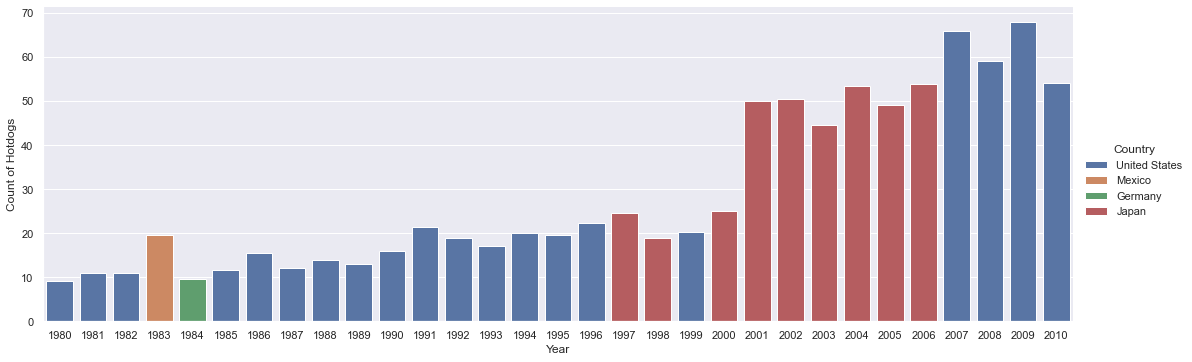

In [50]:
# Subsetting the following columns for the bar chart
# Year, "Dogs eaten", Country
import seaborn as sns
# hotdog_contest_subset
hotdog_contest_subset = hotdog_contest_winner_df[["Year","Dogs eaten","Country"]]


plt = sns.catplot(x='Year', y='Dogs eaten',hue='Country', 
        data=hotdog_contest_subset, kind='bar', dodge=False, aspect=3)
plt.set_xlabels("Year")
plt.set_ylabels("Count of Hotdogs")
plt.set_titles("Python Bar Chart")